In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) 
        self.fc1 = nn.Linear(128 * 28 * 28, 512)  
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 2)  
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))  
        x = self.dropout(x)
        x = self.fc3(x)

        return x


model = CustomCNN()


In [5]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=model.to(device)

In [6]:
data_dir=r'F:\Dataset for Images\Shoes Classification'

In [8]:
data_transforms={
    'train':transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2,hue=0.1),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ]),
    'validataion':transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ]),
    'test':transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ])
}

In [9]:
train_datasets=datasets.ImageFolder(root=f'{data_dir}/train',transform=data_transforms['train'])
test_datasets=datasets.ImageFolder(root=f'{data_dir}/test',transform=data_transforms['test']),
validation_datasets=datasets.ImageFolder(root=f'{data_dir}/validation',transform=data_transforms['validataion'])

In [11]:
train_loader=DataLoader(dataset=train_datasets,shuffle=True,batch_size=64)
test_loader=DataLoader(dataset=test_datasets,shuffle=False,batch_size=64)
validation_loader=DataLoader(dataset=validation_datasets,shuffle=False,batch_size=64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


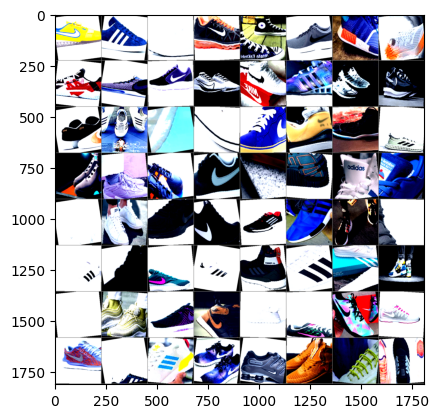

nike adidas adidas nike nike nike adidas adidas nike nike nike nike nike adidas adidas nike nike adidas adidas nike nike nike adidas adidas nike adidas adidas nike nike adidas adidas adidas adidas adidas nike nike adidas adidas adidas adidas adidas nike nike adidas adidas adidas adidas adidas adidas nike nike adidas adidas nike nike nike nike adidas adidas nike nike nike nike adidas


In [12]:
def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    

dataiter=iter(train_loader)
images,labels=next(dataiter)
class_names=train_loader.dataset.classes

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{class_names[labels[j]]}' for j in range(len(labels))))


In [13]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [21]:
def train_model(model, train_loader, validation_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()  
        running_loss = 0.0
        total = 0
        correct = 0

       
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total

        model.eval()  
        val_correct = 0
        val_total = 0
        val_running_loss = 0.0

        with torch.no_grad():
            for inputs, labels in validation_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_running_loss / len(validation_loader.dataset)
        val_acc = val_correct / val_total

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')

    return model

trained_model = train_model(model, train_loader, validation_loader, criterion, optimizer, num_epochs=20)


Epoch 1/20, Loss: 0.6803, Accuracy: 0.6239, Val Loss: 0.6108, Val Accuracy: 0.5818
Epoch 2/20, Loss: 0.6680, Accuracy: 0.5891, Val Loss: 0.6097, Val Accuracy: 0.6909
Epoch 3/20, Loss: 0.6775, Accuracy: 0.5978, Val Loss: 0.6164, Val Accuracy: 0.6364
Epoch 4/20, Loss: 0.6594, Accuracy: 0.5978, Val Loss: 0.6142, Val Accuracy: 0.6545
Epoch 5/20, Loss: 0.6516, Accuracy: 0.6217, Val Loss: 0.6120, Val Accuracy: 0.6727
Epoch 6/20, Loss: 0.6533, Accuracy: 0.6326, Val Loss: 0.6101, Val Accuracy: 0.6182
Epoch 7/20, Loss: 0.6545, Accuracy: 0.6283, Val Loss: 0.6345, Val Accuracy: 0.6364
Epoch 8/20, Loss: 0.6635, Accuracy: 0.6043, Val Loss: 0.6352, Val Accuracy: 0.6364
Epoch 9/20, Loss: 0.6615, Accuracy: 0.6196, Val Loss: 0.6372, Val Accuracy: 0.6364
Epoch 10/20, Loss: 0.6536, Accuracy: 0.6348, Val Loss: 0.6410, Val Accuracy: 0.6727
Epoch 11/20, Loss: 0.6668, Accuracy: 0.5957, Val Loss: 0.6516, Val Accuracy: 0.6000
Epoch 12/20, Loss: 0.6783, Accuracy: 0.5978, Val Loss: 0.6446, Val Accuracy: 0.6364
E